In [339]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

In [340]:
df = pd.read_csv("weatherAUS.csv")
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [341]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [342]:
target = "RainTomorrow"
numFeatures = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Temp9am",
    "Temp3pm",
    "Pressure3pm",
    "Pressure9am",
    "Cloud9am",
    "Cloud3pm",
    "Year",
    "Month",
    "Day",
]
catFeatures = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow",
]


In [343]:
df['Date'] = pd.to_datetime(df['Date'])

In [344]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [345]:
df.drop('Date',inplace= True,axis=1)

In [346]:
df[catFeatures].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [347]:
df[numFeatures].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Temp9am           1767
Temp3pm           3609
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Year                 0
Month                0
Day                  0
dtype: int64

In [348]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [349]:
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [350]:
df = df.join(pd.get_dummies(df.Location, drop_first=True))
df.drop('Location',inplace= True,axis=1)

In [351]:
for col in ['WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']:
 df = df[df[col].notna()]

In [352]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [353]:
pd.get_dummies(df.WindGustDir, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [354]:
df = df.join(pd.get_dummies(df.WindGustDir, drop_first=True, prefix="WGD"))
df.drop('WindGustDir', inplace=True, axis=1)

In [355]:
df["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [356]:
pd.get_dummies(df.WindDir3pm, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [357]:
df = df.join(pd.get_dummies(df.WindDir3pm, drop_first=True, prefix="WD3PM"))
df.drop('WindDir3pm',inplace= True,axis=1)

In [358]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [359]:
pd.get_dummies(df.WindDir9am, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [360]:
df = df.join(pd.get_dummies(df.WindDir9am, drop_first=True, prefix="WD9AM"))
df.drop('WindDir9am',inplace= True,axis=1)

In [361]:
df['RainToday'] = (df['RainToday']=="Yes").astype(int)
df['RainTomorrow'] = (df['RainTomorrow']=="Yes").astype(int)


In [362]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD9AM_NNW,WD9AM_NW,WD9AM_S,WD9AM_SE,WD9AM_SSE,WD9AM_SSW,WD9AM_SW,WD9AM_W,WD9AM_WNW,WD9AM_WSW
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,...,0,0,0,1,0,0,0,0,0,0
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,...,0,0,0,1,0,0,0,0,0,0
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,...,0,0,0,1,0,0,0,0,0,0


In [363]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.backend import set_session

import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer
from keras.layers import PReLU


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import time
%matplotlib inline

import gc

In [364]:
for col in numFeatures:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 


In [365]:
df[numFeatures] = df[numFeatures].apply(lambda x: (x-x.mean())/x.std())

In [366]:
features = df.columns.tolist()
features.remove(target)
print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month', 'Day', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera', 'WGD_ENE', 'WGD_ESE', 'WGD_N', 'WGD_NE', 'WGD_NNE', 'WGD_NNW', 'WGD_NW', 'WGD_S', 'WGD_SE', 'WGD_SSE', 'WGD_SSW', 'WGD_SW', 'WGD_W', 'WGD_

In [367]:
# Funkcja pomocnicza,która pozwoli nam również zaawansowane funkcje aktywacji wybierać po imieniu
def actModel(model, activation):
    if activation=='prelu':
        model.add(keras.layers.advanced_activations.PReLU(weights=None, alpha_initializer="zero"))
    else:
        model.add(Activation(activation))
    return


# Wydzielona funkcja, która odpowiada wyłącznie za budowę sieci.
def create_network(n=3, nu1=10, nu2=5, nu3=5,
                   activation='relu',
                   dropout=Dropout,
                   dropout_rate=0,
                   regu=0,
                   kernel_initializer='lecun_normal',
                   optimizer='SGD',
                   num_classes=1, 
                  inputShape=10, dropout_all_layers = False, debug=False, *args, **kwargs):
    nu=[nu1, nu2, nu3]
    # Jeżeli włączony jest tryb debug wyświetlimy parametry funkcji
    if debug:
        print(locals())
        
    # Inicjacja podstawowego modelu keras w trybie sekwencyjnym
    # W ten sposób najłatwiej zbutować w pełni połączone sieci feed forward.
    model = Sequential()
    
    # Definicja inputów do sieci oraz pierwszej warstwy
    # nu[0] odpowiada za liczbę neuronów w pierwszej warstwie
    # dodatkowo ustalamy jak inicjalizować parametry raz czy stosować refularyzację.
    model.add(Dense(nu[0],input_shape=(inputShape,),
                    kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(regu)))
    
    # Dodanie funkcji aktywacji do pierwszej warstwy.
    actModel(model, activation)
    
    # Opcjonalne włączenie mechanizmu dropout
    if dropout_rate > 0.01:
        model.add(dropout(dropout_rate))
    
    # Kolejne warstwy budowane są w ten sam sposób, co pozwala budować je w pętli
    # Pierwsza warstwa jako jedyna musiała mieć zdefiniowany input
    # W pozostałych warstwach model automatycznie keras połączy warstwy,
    # Input do kolejnej warstwy będzie outputem z wcześniejszych warstw.
    for i in range(1, n):
        # Inicjalizacja warstwy przez potanie liczby neuronów oraz sposobu inicjacji
        model.add(Dense(nu[i], kernel_initializer=kernel_initializer))
        # Definicja funkcji aktywacji
        actModel(model, activation)
        
        # Opcjonalne dodanie dropout
        if dropout_rate > 0.01 and dropout_all_layers:
            model.add(dropout(dropout_rate))

    # Aby "zakończyć" sieć niezbędne jest przygotowanie odpowiedniej liczby neuronów
    # Wystarczy jeden neuron dla regresji
    # Dla klasyfikacji binarnej oraz wieloklasowej potrzeba tyle neuronów co klas.
    # Dla binarne będą to dwa neurony.
    # W przypadku klasyfikacji wieloklasowej target musi być również podany w postaci one- hot encoding.
    model.add(Dense(num_classes))
    
    # Dla klasyfikacji binarnej lub wieloklasowej jako funkcję aktywacji stosujemy softmax
    # Będzie on odpowiadał transformacji logistycznej.
    # W problemie regresji możemy po prostu wykorzystać funkcję liniową.
    # Na chwilę obecną budujemy wrapper dla klasyfikacji binarnej
    # Poniżej pozostawiamy softmax, z funkcją straty categorical_crossentropy oraz accuracy jak bazową metryką.
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [368]:
from sklearn.metrics import roc_auc_score
# Funkcja net będzie naszym wrapperem do budowania siecie, trenowania, oraz zbierania wyników/statystyk.
def net(train, test, features, target, epochs = 30, batchSize=100, debug=False, *args, **kwargs):
    
    # Przygotowanie zmiennych
    y_train = pd.get_dummies(train[target]).values
    y_test = pd.get_dummies(test[target]).values
    x_train = train[features].values
    x_test = test[features].values
    
    num_classes = y_train.shape[1]
    
    # Wyświetlenie informacji opisowych jeżeli jesteśmy w trybie debugowym
    if debug:
        print('Loading data...')
        print(len(x_train), 'train sequences')
        print(len(x_test), 'test sequences')
        print(num_classes, 'classes')
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)
        print('\nBuilding network 1...')
    
    # Stworzenie modelu z użyciem funkcji create_network.
    model = create_network(num_classes=num_classes, inputShape=x_train.shape[1], debug=debug, *args, **kwargs)
    
    # Przygotowanie zmiennych do przechowywania statystyk dotyczących szkolenia
    history_model = dict()
    loss = []
    valLoss = []
    acc = []
    valAcc = []
    auc = []
    valAuc = []
    
    
    bestTrainProba = []
    bestTestProba = []
    bestAuc = 0
    # Iteracyjne uruchomienie szkolenia.
    # UWAGA! W "profesjonalnym" wykorzystaniu Kerasa stosuje się tzw. callbacki, 
    # callbacki to funkcje do uruchamiania pomiędzy iteracjami.
    # W naszej dydaktycznej implementacji sami będziemy iterować szkolenie w pętli po jednej iteracji
    for z in range(epochs):
        # Wykonaj jedną ideacje szkolenia
        histModel = model.fit(x_train,
                                    y_train,
                                    batch_size=batchSize,
                                    epochs=1,
                                    verbose=debug,
                                    validation_split=0.0,
                                   validation_data=(x_test, y_test))
        # Zrób prognoze na zbiorze treningowym
        probaTrain = model.predict(x_train,
                                       batch_size=y_train.shape[0],
                                       verbose=debug)
        # Zrób prognozę na zbiorze testowym
        probaTest = model.predict(x_test,
                                       batch_size=y_test.shape[0],
                                       verbose=debug)
        # Obliczenie statystyk AUC
        # We wcześniejszych wersjach Keras nie miał wbudowanego liczenia auc pomiędzy iteracjami
        aucTrain = roc_auc_score(train[target], probaTrain[:,1])
        aucTest = roc_auc_score(test[target], probaTest[:,1])
        if debug:
            print(aucTrain, aucTest)
            
        # Ręczna implementacja zapisywania prognoz z najlepszej iteracji
        if aucTest>bestAuc:
            bestAuc = aucTest
            bestTrainProba = probaTrain[:, 1].tolist()
            bestTestProba = probaTest[:, 1].tolist()
        
        # Zapisanie wyników w tej iteracji
        print(histModel.history)
        loss.append(histModel.history['loss'][0])
        valLoss.append(histModel.history['val_loss'][0])
        acc.append(histModel.history['accuracy'][0])
        valAcc.append(histModel.history['val_accuracy'][0])
        auc.append(aucTrain)
        valAuc.append(aucTest)
        
    # Zapisanie wyników ze wszystkich iteracji do słownika
    history_model['loss'] = loss
    history_model['valLoss'] = valLoss
    history_model['acc'] = acc
    history_model['valAcc'] = valAcc
    history_model['auc'] = auc
    history_model['valAuc'] = valAuc
    return max(valAuc), bestTrainProba, bestTestProba, history_model


{'loss': [0.4100683033466339], 'accuracy': [0.8145201206207275], 'val_loss': [0.3715178966522217], 'val_accuracy': [0.8379274010658264]}
{'loss': [0.35858798027038574], 'accuracy': [0.8439553380012512], 'val_loss': [0.35808414220809937], 'val_accuracy': [0.8452025055885315]}
{'loss': [0.34956368803977966], 'accuracy': [0.8488861918449402], 'val_loss': [0.35211750864982605], 'val_accuracy': [0.8475466966629028]}
{'loss': [0.3447360098361969], 'accuracy': [0.8515653014183044], 'val_loss': [0.348536878824234], 'val_accuracy': [0.8498100638389587]}
{'loss': [0.3413391709327698], 'accuracy': [0.8523967266082764], 'val_loss': [0.34576138854026794], 'val_accuracy': [0.8505914211273193]}
{'loss': [0.3385293483734131], 'accuracy': [0.8546023368835449], 'val_loss': [0.3434566557407379], 'val_accuracy': [0.8512650728225708]}
{'loss': [0.33619844913482666], 'accuracy': [0.8556185364723206], 'val_loss': [0.34183406829833984], 'val_accuracy': [0.8517770171165466]}
{'loss': [0.33420243859291077], 'ac

FileNotFoundError: [Errno 2] No such file or directory: 'imgNets/opti_2_100_40_10.png'

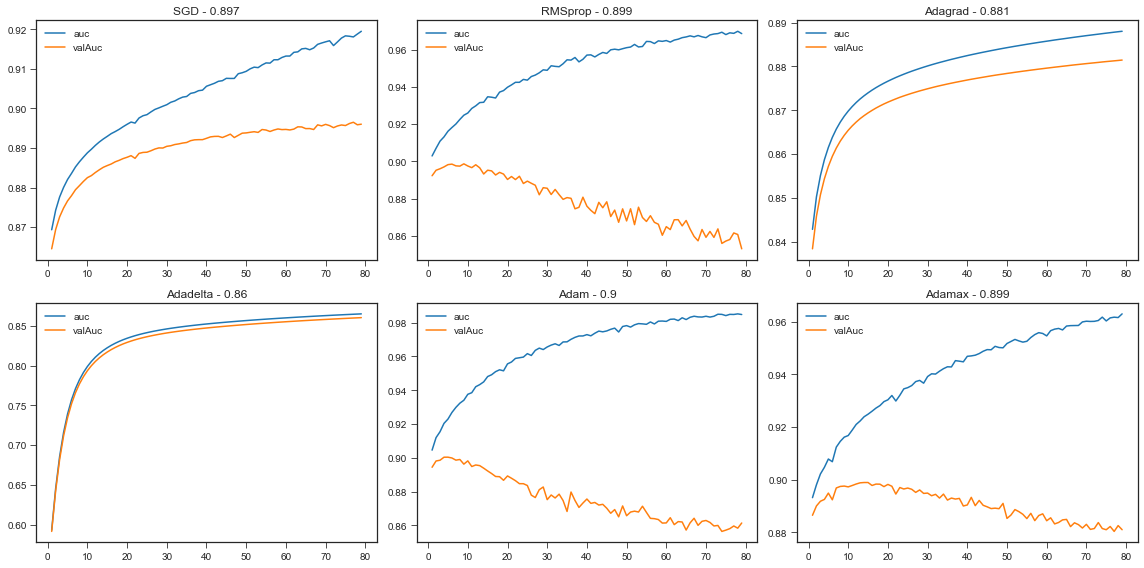

In [372]:
opti = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax"]
test_size=0.3
X_train, X_valid = train_test_split(df, test_size=test_size, random_state=2020, stratify=df[target].values)
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

0.8793782895926798


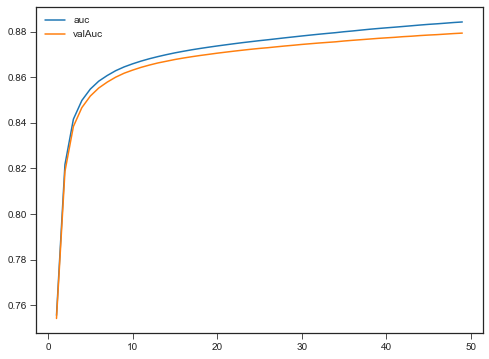

In [371]:
history = pd.DataFrame(history)
print(history.valAuc.max())
history.loc[1:, ["auc", "valAuc"]].plot(figsize=(8,6))
plt.show()